In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

# Simple Linear Regression

In [2]:
auto_mpg = pd.read_csv("auto-mpg.csv")

In [3]:
y = auto_mpg["mpg"]
X_baseline = auto_mpg[["weight"]]
simple_model = sm.OLS(y, sm.add_constant(X_baseline))
simple_results = simple_model.fit()

display(simple_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          6.02e-102
Time:                        18:06:24   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

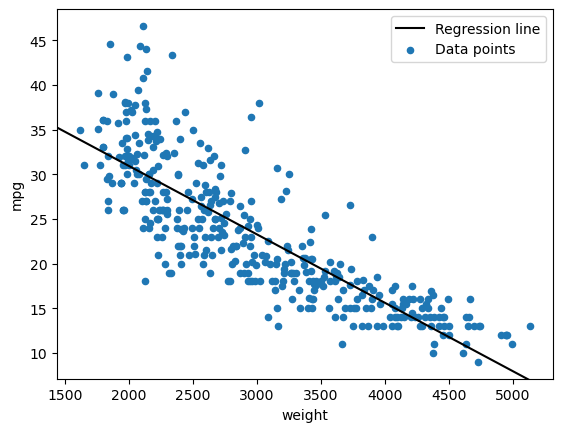

In [4]:
fig, ax = plt.subplots()
auto_mpg.plot.scatter(x="weight", y="mpg", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=simple_results, label="Regression line", ax=ax, color="black")
ax.legend();

# Multiple Linear Regression

In [5]:
X_all = auto_mpg.drop("mpg", axis=1).select_dtypes("number")
third_model = sm.OLS(y, sm.add_constant(X_all))
third_results = third_model.fit()

display(third_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          2.04e-139
Time:                        18:06:24   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
model year       0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## partial regression plot

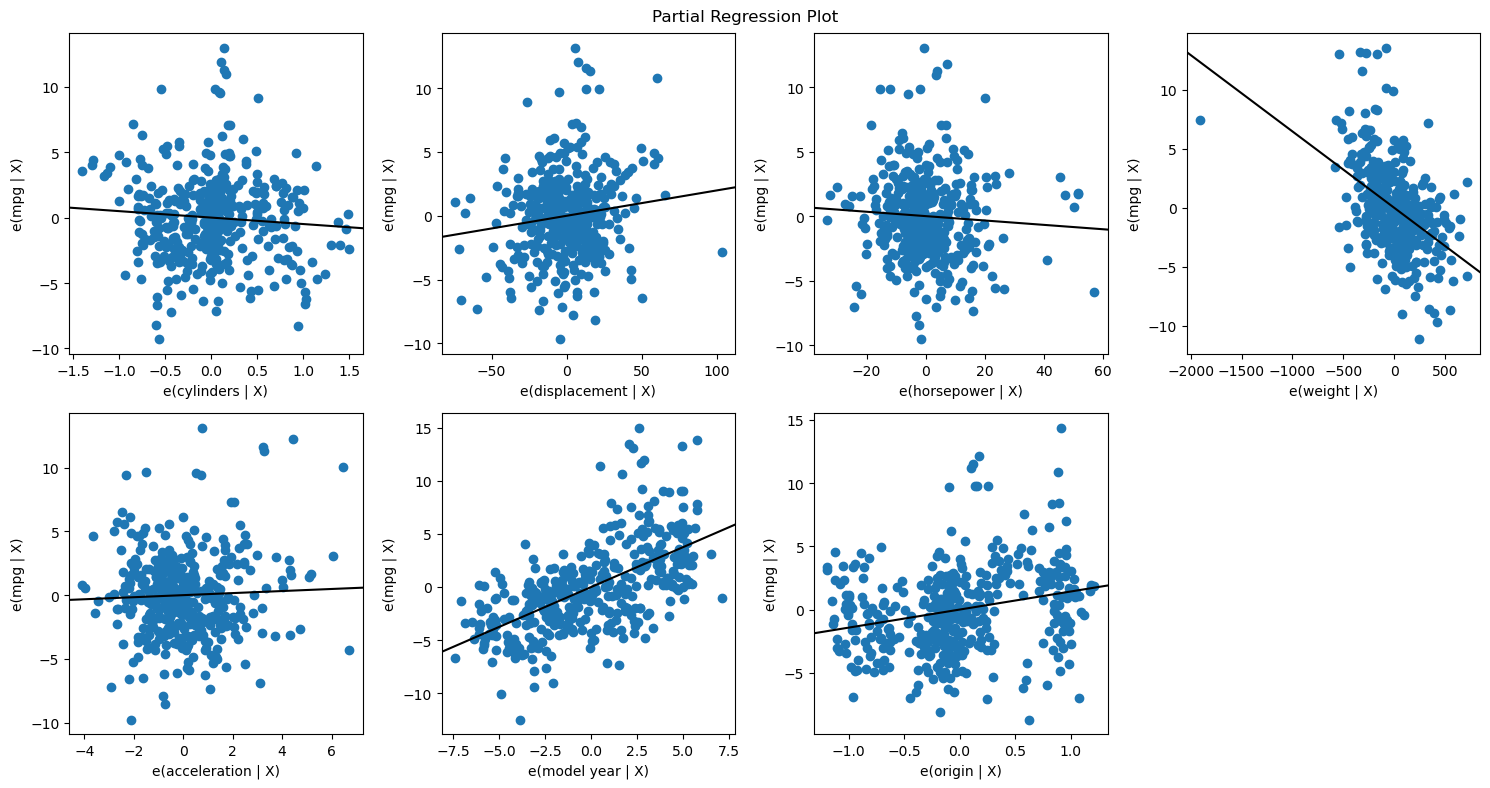

In [6]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    third_results,
    exog_idx=list(X_all.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

## Error Metrics

$$
R^2 = \frac{ESS}{TSS} = \frac{\sum_i (\hat{y}_i - \bar{y}_i)^2}{\sum_i (y_i - \bar{y}_i)^2}
$$

* y hat is predicted, y bar is mean, plain y is actual
    * so you're comparing the ratio of predicted to actual and using the distance from the mean to calc
* Error metrics can be wrong/misleading in some situations
* Can't just sum residiuals because they can mix positive and negative numbers.  
    * R^2 solves this by squaring them
    * RMSE takes the square root after this
    * MAE (Mean Absolute Value) solves this with absolute value
* RMSE and MAE give you numbers that kept their scale so you can compare/report easier

## Categoricals

### One Hot Encoding
Use this for EDA or if you want a dataframe

In [7]:
y_ohe = auto_mpg["mpg"]
X_ohe = auto_mpg[["weight", "model year", "origin"]]
X_ohe = pd.get_dummies(X_ohe, columns=["origin"], drop_first=True, dtype=int)#avoid dummy trap which introduces multi collinearity
X_ohe

,weight,model year,origin_2,origin_3
0,3504,70,0,0
1,3693,70,0,0
2,3436,70,0,0
3,3433,70,0,0
4,3449,70,0,0
...,...,...,...,...
387,2790,82,0,0
388,2130,82,1,0
389,2295,82,0,0
390,2625,82,0,0


In [8]:
ohe_model = sm.OLS(y, sm.add_constant(X_all))
ohe_results = ohe_model.fit()

display(ohe_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          2.04e-139
Time:                        18:06:25   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
model year       0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OHE SKLearn
use this for predictive machine learning

In [9]:
from sklearn.preprocessing import OneHotEncoder
data_cat = auto_mpg[["origin"]].copy()

ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe.fit(data_cat)
ohe.transform(data_cat)
data_cat_ohe = pd.DataFrame(
    data=ohe.transform(data_cat),
    columns=[f"origin_{cat}" for cat in ohe.categories_[0][1:]]
)
data_cat_ohe
X_sklearn = pd.concat([auto_mpg[["weight", "model year"]], data_cat_ohe], axis=1)

model_2 = sm.OLS(y, sm.add_constant(X_sklearn))
results_2 = model_2.fit()
display(results_2.params)

const        -18.306944
weight        -0.005887
model year     0.769849
origin_2       1.976306
origin_3       2.214534
dtype: float64

### Reference Category
A reference category whatever is dropped to avoide the dummy variable trap, it drops the first by default but you can specify it

In [10]:
X_ref = auto_mpg[["weight", "model year", "origin"]]
X_ref = pd.get_dummies(X_ref, columns=["origin"], dtype=int)
X_ref = X_ref.drop("origin_2", axis=1)

This will alter const and the ohe coefficients.

You choose a ref based on data understanding and stakeholders 

### Data Cleaning
You want to be sure to clean data before OHE (ex fixing mispellings)

# Regression Diagnostics

## Linear Transformations
* Transform the scale, mean or both
* No effect on models, just on intepretation and data understanding and for making it clear what it means to you and stakeholders


### Scaling - Multiplying

In [11]:
X_initial = auto_mpg[["cylinders", "weight", "model year"]]
X_metric = X_initial.copy()
# 1 lb = 0.45 kg
X_metric["weight"] = X_metric["weight"] * 0.453592

X_metric

,cylinders,weight,model year
0,8,1589.386368,70
1,8,1675.115256,70
2,8,1558.542112,70
3,8,1557.181336,70
4,8,1564.438808,70
...,...,...,...
387,4,1265.521680,82
388,4,966.150960,82
389,4,1040.993640,82
390,4,1190.679000,82


In [12]:
# 1 mpg = 0.425 km/L
y_metric = auto_mpg["mpg"] * 0.425144
# "mpg" is no longer an accurate name, so rename
y_metric.name = "km/L"

y_metric

0       7.652592
1       6.377160
2       7.652592
3       6.802304
4       7.227448
         ...    
387    11.478888
388    18.706336
389    13.604608
390    11.904032
391    13.179464
Name: km/L, Length: 392, dtype: float64

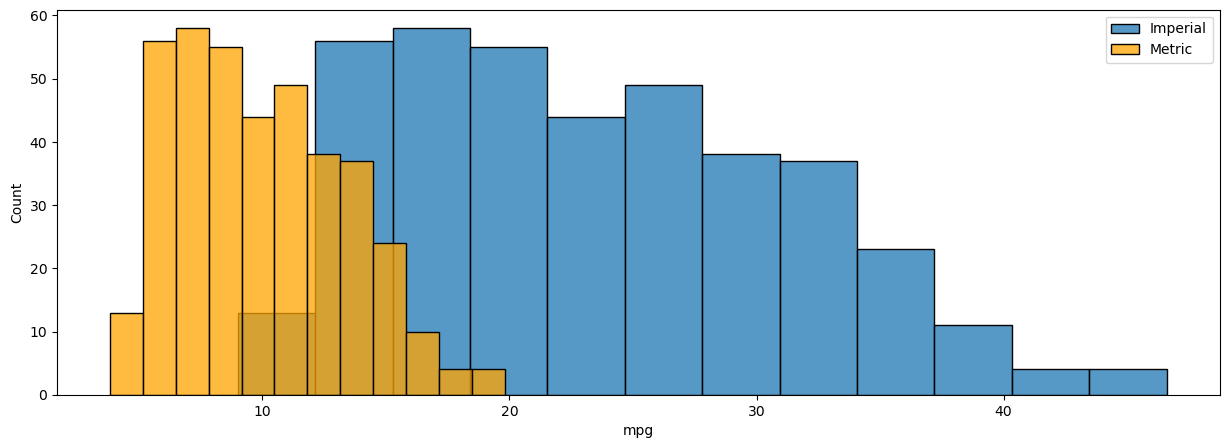

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=y, label="Imperial", ax=ax)
sns.histplot(data=y_metric, label="Metric", color="orange", ax=ax)
ax.legend();

### Shifting - Adding

ex Shift ref date to 1900 for "years since 1900"

In [14]:
X_years_ce = X_initial.copy()
X_years_ce["model year"] = X_years_ce["model year"] + 1900
X_years_ce

,cylinders,weight,model year
0,8,3504,1970
1,8,3693,1970
2,8,3436,1970
3,8,3433,1970
4,8,3449,1970
...,...,...,...
387,4,2790,1982
388,4,2130,1982
389,4,2295,1982
390,4,2625,1982


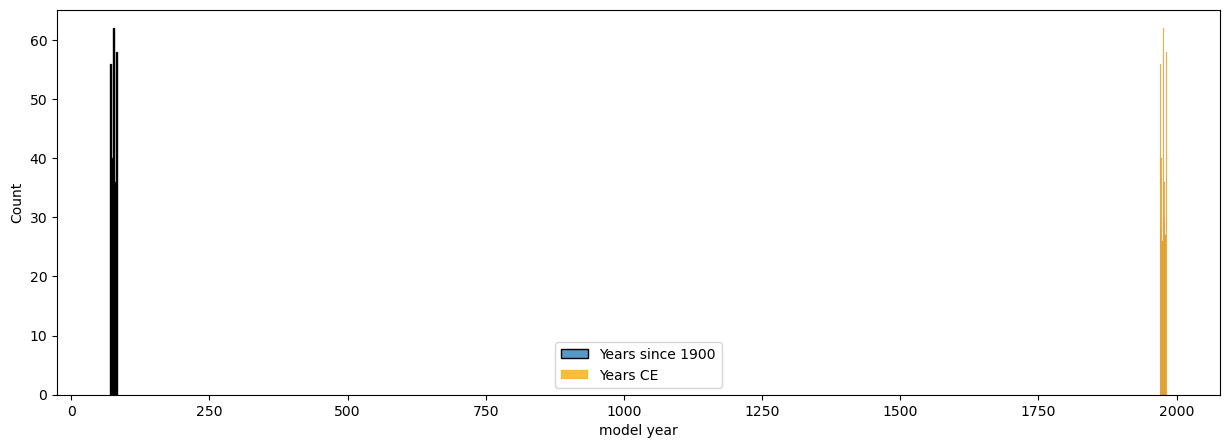

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=X_initial, x="model year", label="Years since 1900", ax=ax)
sns.histplot(data=X_years_ce, x="model year", label="Years CE", color="orange", ax=ax)
ax.legend();

### Shifting to Improve Intercept Interpretability

Example to shift so that **a value of 0 represents the mean** rather than representing 0. This specific approach is typically called zero-centering (or simply ***centering***) and some machine learning models work much better with data centered around 0.

Note this makes it less interpretable

In [16]:
X_centered = X_initial.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

,cylinders,weight,model year
count,3.920000e+02,3.920000e+02,3.920000e+02
mean,-3.711317e-15,4.118248e-13,-4.640279e-15
std,1.705783e+00,8.494026e+02,3.683737e+00
min,-2.471939e+00,-1.364584e+03,-5.979592e+00
25%,-1.471939e+00,-7.523342e+02,-2.979592e+00
50%,-1.471939e+00,-1.740842e+02,2.040816e-02
75%,2.528061e+00,6.371658e+02,3.020408e+00
max,2.528061e+00,2.162416e+03,6.020408e+00


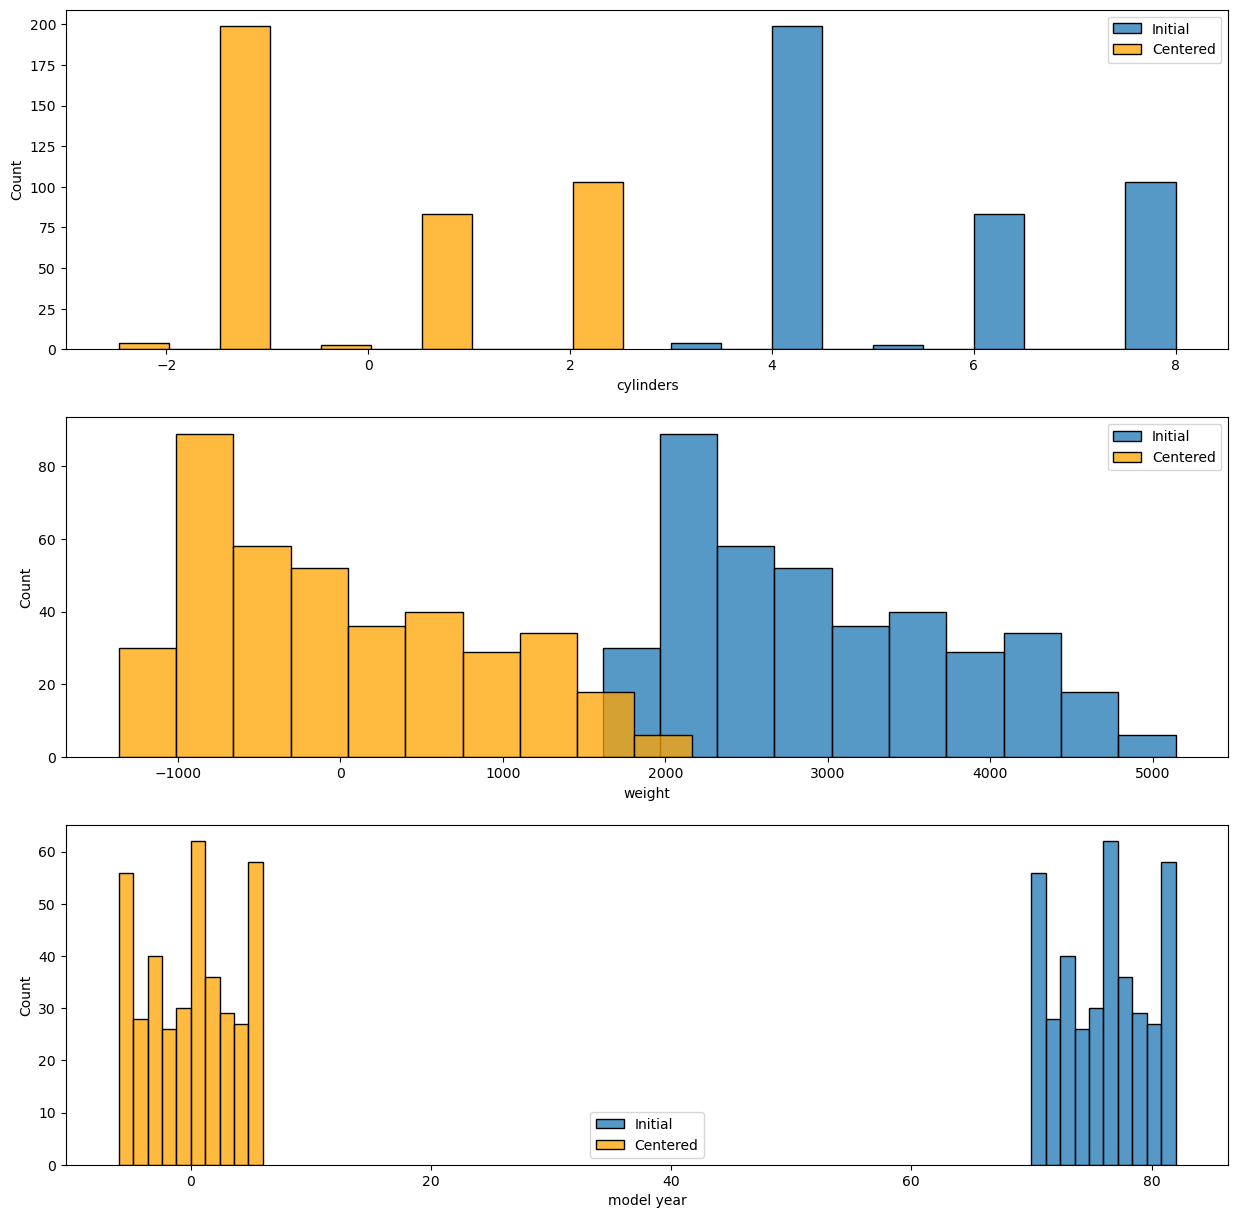

In [17]:
fig, axes = plt.subplots(nrows=3, figsize=(15,15))

for index, col in enumerate(X_initial.columns):
    sns.histplot(data=X_initial, x=col, label="Initial", ax=axes[index])
    sns.histplot(data=X_centered, x=col, label="Centered", color="orange", ax=axes[index])
    axes[index].legend()

### Other Scalers

* Min-Max
* Mean Normalization
* Unit Vector Transformation

## Log Transformations - Exponential transformations

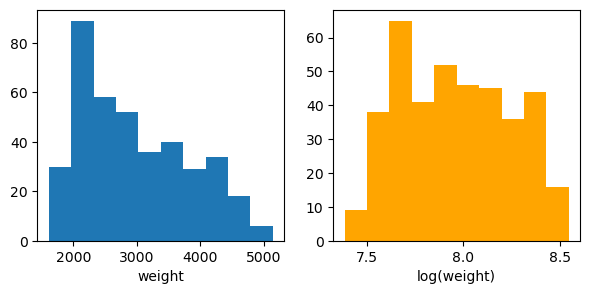

In [18]:
X_raw = auto_mpg[["weight", "model year"]]
y_raw = auto_mpg["mpg"]
X_weight_log = X_raw.copy()

X_weight_log["log(weight)"] = np.log(X_weight_log["weight"])

# Visually inspect raw vs. transformed values
X_weight_log[["weight", "log(weight)"]]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(X_weight_log["weight"])
ax1.set_xlabel("weight")
ax2.hist(X_weight_log["log(weight)"], color="orange")
ax2.set_xlabel("log(weight)");

In [19]:
weight_log_model = sm.OLS(y_raw, sm.add_constant(X_weight_log))
weight_log_results = weight_log_model.fit()
display(weight_log_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     727.0
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          8.03e-159
Time:                        18:06:26   Log-Likelihood:                -990.71
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     388   BIC:                             2005.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         284.2873     29.393      9.672      0.000     226.498     342.077
weight          0.0078      0.001      5.473      0.000       0.005       0.011
model year      0.8287      0.045     18.620      0.000       0.741       0.916
log(weight)   -43.5906      4.259    -10.235      0.000     -51.964     -35.217
==============================================================================
Omnibus:                       70.060   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.355
Skew:                           0.881   Prob(JB):                     2.27e-38
Kurtosis:                       5.741   Cond. No.                     5.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting 

$$ log(1.01) \approx 0.01 $$

> For each increase of 1% in weight, we see an associated decrease of about 0.2 in MPG

In [20]:
weight_log_results.params["log(weight)"]  / 100

-0.4359063301744152

#### Use np.log(percent)
Use np.log() for values greater than 1%
> For each increase of 50% in weight, we see an associated decrease of about 8.3 MPG

In [21]:
weight_log_results.params["log(weight)"] * np.log(1.5)

-17.674480728920244

#### Log Transformed Predictor vs. Log Transformed Target

We are modeling the relationship as:

$$ \large{ log(y) = \beta * log(x) \ldots } $$

For **small** values of $\beta$ and a 1% increase, we can interpret $\beta$ as:

> For each increase of $\large{1\%}$ in $\large{x}$, we see an associated change of $\large{\beta\%}$ in $\large{y}$

For **larger** values of $\beta$ and/or percentages larger than 1%, we can also use this formula:

> For each increase of $\large{p\%}$ in $\large{x}$, we see an associated change of $\large{((e^{\beta * log((100 + p)/100)} - 1) * 100)\%}$ in $\large{y}$

```python
(np.exp(np.log(1.01) * log_results.params["log(weight)"]) - 1) * 100
```

# Interactions
- **Purpose**: Capture interactions between multiple independent variables
- **Types**: Numeric-Numeric, Numeric-Categorical


In [22]:
# Create interaction term
auto_mpg['weight_cylinders'] = auto_mpg['weight'] * auto_mpg['cylinders']
X = auto_mpg[['weight', 'cylinders', 'weight_cylinders']]
y = auto_mpg['mpg']
X = sm.add_constant(X)  # Add constant term

interaction_model = sm.OLS(y, X).fit()
display(interaction_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     328.3
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          4.62e-106
Time:                        18:06:26   Log-Likelihood:                -1113.5
No. Observations:                 392   AIC:                             2235.
Df Residuals:                     388   BIC:                             2251.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               65.3865      3.733     17.514      0.000      58.046      72.727
weight              -0.0128      0.001     -9.418      0.000      -0.016      -0.010
cylinders           -4.2098      0.724     -5.816      0.000      -5.633      -2.787
weight_cylinders     0.0011      0.000      5.226      0.000       0.001       0.002
==============================================================================
Omnibus:                       54.204   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.560
Skew:                           0.758   Prob(JB):                     1.62e-24
Kurtosis:                       5.100   Cond. No.                     3.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpret Coefficients
- **Intercept**: Baseline mpg for the reference group
- **Weight**: Change in mpg per unit weight for the reference group
- **Cylinders**: Change in mpg per unit cylinder for the reference group
- **Interaction**: Additional change in mpg when both weight and cylinders change

## Example Interpretation
- For a car with average weight and 4 cylinders, mpg decreases as weight increases.
- Interaction term shows how the effect of weight on mpg changes with the number of cylinders.


# Data Ethics - Training On Bad Data
- **Algorithmic Bias**: Unfair, discriminatory outcomes from algorithmic decisions.
- **Inaccurate Features & Unrepresentative Samples**: Skewed data affects model accuracy and fairness.

# Machine Learning Fundamentals
- **Supervised Learning**: Learning a function that maps an input to an output based on example input-output pairs.
- **Unsupervised Learning**: Learning patterns in the input when no output is present.
- **Reinforcement Learning**: Learning to make decisions by taking actions in an environment to maximize cumulative reward.


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data Science Processes
- **CRISP-DM**: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, Deployment
- **KDD**: Selection, Preprocessing, Transformation, Data Mining, Interpretation/Evaluation
- **OSEMN**: Obtain, Scrub, Explore, Model, Interpret


# Statistical Learning Theory
- **Modeling for Inference**: Focuses on understanding the relationship between variables. For example, understanding how weight affects mpg in cars. It's about finding out which variables are important and how they impact the outcome. Although inference models can make predictions, their main goal is to explain the data.
- **Modeling for Prediction**: Focuses on making accurate predictions. For example, predicting the mpg of a car based on its weight and other features. It's about building a model that performs well on new, unseen data. While prediction models can also provide some insights, their main goal is accuracy in predicting future data.
- **Model Generalization**: The ability of a model to perform well on new data that it has never seen before.

Note that many models can be used for both inference and prediction, like linear regression.  It's about what your focus is in this case.


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[ 0.49361082  0.45311703  0.81346423  0.69325009 -0.64102194]


# Regression Model Validation
- **Train-Test Split**: Splitting data into training and testing sets to evaluate model performance.
- **Residuals**: Differences between actual values and predicted values, used to calculate model error.
- **Overfitting and Underfitting**: Overfitting occurs when a model is too closely fitted to the training data and fails to generalize to new data. Underfitting occurs when a model is too simple to capture the underlying pattern of the data.

## Identifying Model Fit

| Metric                      | Overfit                         | Underfit                        | Well-Fit                          |
|-----------------------------|---------------------------------|---------------------------------|-----------------------------------|
| **Train MSE**               | Very low                        | High                            | Low                               |
| **Test MSE**                | High                            | High                            | Similar to Train MSE              |
| **Train R-squared**         | Very high (close to 1)          | Low                             | Good to High                      |
| **Test R-squared**          | Low                             | Low                             | Similar to Train R-squared        |
| **Train vs. Test Accuracy** | Large difference, Train >> Test | Similar, both low               | Similar, both high                |
| **Residuals Distribution**  | Residuals very small for Train  | Large residuals for both        | Residuals small and similar for both |
| **Cross-Validation Scores** | High variance across folds      | Consistently poor across folds  | Consistent and stable across folds|


# Introduction to Cross-Validation
- **Cross-Validation**: A model validation strategy that splits data into multiple sections (folds) to better estimate model performance and generalizability.
- **Limitations of Train-Test Split**: Metrics from a single split can be highly dependent on the specific data split, leading to an overly optimistic or pessimistic view of model performance.

## Performing Cross-Validation

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
cv_scores = cross_val_score(linreg, X, y, cv=10)
display(cv_scores)

array([ 0.61987019,  0.45273539,  0.17288584,  0.74965314,  0.68547793,
        0.90131532,  0.73460828,  0.66545188, -0.62719583, -0.17059366])

In [28]:
from sklearn.metrics import make_scorer, mean_squared_error

# Custom scoring function
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation with custom scoring
cv_scores = cross_val_score(linreg, X, y, scoring=mse_scorer, cv=10)
print(cv_scores)


[-10.31672304 -21.34024142 -23.34952519  -9.74064908  -7.71199443
  -4.14079861 -11.5650071  -17.17771087 -55.93837092 -38.63988838]


In [29]:
# Calculate average cross-validation score
cv_scores = cross_val_score(linreg, X, y, scoring="neg_mean_squared_error", cv=10)
average_cv_score = -cv_scores.mean()
print("Average Cross-Validation MSE:", average_cv_score)

Average Cross-Validation MSE: 19.992090903615313


**Key Differences**:

- **Reliability**: Cross-validation provides a more reliable estimate of model performance.
- **Computational Cost**: Cross-validation is more computationally expensive due to multiple training iterations.
- **Data Leakage**: Cross-validation requires careful handling to avoid data leakage, often mitigated by using pipelines.

Use **train-test split** for quick, simple validations. Use **cross-validation** for more reliable, in-depth model performance evaluations.

If you scale your model between 0 and 1 MSE is a lot easier to read

# Bias-Variance Tradeoff

## Key Concepts

- **Bias-Variance Tradeoff**: Balancing model complexity to achieve the best predictive performance.
- **Bias**: Error due to incorrect model assumptions. High bias leads to underfitting.
- **Variance**: Error due to model sensitivity to small fluctuations in the training set. High variance leads to overfitting.
- **Irreducible Error**: Error that cannot be reduced regardless of the model used.

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_bias_variance.png" alt="Drawing" width="500">

## Train-Test Split Example


## Bias vs. Variance

- **High Bias (Underfitting)**:
  - Model: Simple Linear Regression
  - Train MSE: High
  - Test MSE: High

- **High Variance (Overfitting)**:
  - Model: 6th Degree Polynomial Regression
  - Train MSE: Low
  - Test MSE: High

- **Balanced (Good Fit)**:
  - Model: 2nd Degree Polynomial Regression
  - Train MSE: Moderate
  - Test MSE: Moderate

## Summary

- **Bias**: Error due to oversimplified models.
- **Variance**: Error due to overly complex models.
- **Irreducible Error**: Random error that cannot be eliminated.

The goal is to find a balance between bias and variance to minimize the total error.


# Ridge and Lasso Regression
- **Ridge Regression**: Adds a penalty equal to the sum of the squared coefficients to the linear regression cost function. Reduces model complexity and helps with multicollinearity.
- **Lasso Regression**: Adds a penalty equal to the sum of the absolute values of the coefficients to the linear regression cost function. Performs both variable selection and regularization.
- **Standardization**: Essential before applying ridge or lasso regression to ensure all features are on the same scale.

## Ridge and Lasso Regression with `auto_mpg` Data

### Data Preparation

In [30]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures


In [31]:
y = auto_mpg[['mpg']]
X = auto_mpg.drop(['mpg', 'car name', 'origin'], axis=1)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Standardize the data
scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

In [32]:
# Ridge Regression
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_transformed, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_transformed, y_train)

# Linear Regression
lin = LinearRegression()
lin.fit(X_train_transformed, y_train)


LinearRegression()

In [33]:
# Polynomial features
poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize polynomial features
X_train_transformed = scale.fit_transform(X_train_poly)
X_test_transformed = scale.transform(X_test_poly)

# Fit models
ridge.fit(X_train_transformed, y_train)
lasso.fit(X_train_transformed, y_train)
lin.fit(X_train_transformed, y_train)

# Generate predictions
y_h_ridge_train = ridge.predict(X_train_transformed)
y_h_ridge_test = ridge.predict(X_test_transformed)
y_h_lasso_train = lasso.predict(X_train_transformed)
y_h_lasso_test = lasso.predict(X_test_transformed)
y_h_lin_train = lin.predict(X_train_transformed)
y_h_lin_test = lin.predict(X_test_transformed)

# Evaluate models
print('Train Error Polynomial Ridge Model:', mean_squared_error(y_train, y_h_ridge_train))
print('Test Error Polynomial Ridge Model:', mean_squared_error(y_test, y_h_ridge_test))

print('Train Error Polynomial Lasso Model:', mean_squared_error(y_train, y_h_lasso_train))
print('Test Error Polynomial Lasso Model:', mean_squared_error(y_test, y_h_lasso_test))

print('Train Error Polynomial Linear Model:', mean_squared_error(y_train, y_h_lin_train))
print('Test Error Polynomial Linear Model:', mean_squared_error(y_test, y_h_lin_test))


Train Error Polynomial Ridge Model: 5.373916330953599
Test Error Polynomial Ridge Model: 10.75130703753721
Train Error Polynomial Lasso Model: 16.43232144318627
Test Error Polynomial Lasso Model: 30.389754971942633
Train Error Polynomial Linear Model: 1.755390326061545e-18
Test Error Polynomial Linear Model: 1431117.8512362642


# Feature Selection Methods
- **Feature Selection**: Process of selecting a subset of relevant features for model construction, improving performance and understanding of the data.
- **Filter Methods**: Preprocessing steps based on statistical characteristics.
- **Wrapper Methods**: Iterative selection methods evaluating model performance.
- **Embedded Methods**: Feature selection methods included within the machine learning algorithm itself.

## Filter Methods
- **SelectKBest**: Select features with the highest statistical significance.

## Wrapper Methods
- **Recursive Feature Elimination (RFE)**: Iteratively removes the least important features based on model performance.
- **RFECV**: Recursive Feature Elimination with Cross-Validation to select the best number of features.

## Embedded Methods
- **Lasso Regression**: Uses L1 regularization to perform feature selection by shrinking some coefficients to zero.
- **LassoCV**: Performs Lasso regression with built-in cross-validation to select the best regularization parameter.

## Other Methods
- **Domain Knowledge**: Use expert knowledge to select important features.
- **VarianceThreshold**: Remove features with low variance.
- **Mutual Information**: Select features based on the amount of shared information between features and the target variable.

## SelectKBest example

In [34]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)
X_reduced = selector.fit_transform(X, y)

/home/atrix/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## RFE Example
**Recursive Feature Elimination (RFE)** - Iteratively remove the least important features.

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(model, n_features_to_select=5)
X_reduced = selector.fit_transform(X, y)

# Introduction to Supervised Learning

## Key Concepts
- **Supervised Learning**: Class of machine learning algorithms that learn from labeled training data to make predictions or classifications.
- **Artificial Intelligence (AI)**: Encompasses various algorithms that perform tasks requiring human intelligence. Machine Learning (ML) is a subset of AI.
- **Machine Learning (ML)**: Divided into Supervised Learning (uses labeled data) and Unsupervised Learning (uses unlabeled data).

## Components of Supervised Learning
- **Task (T)**: The specific problem the model aims to solve (e.g., predicting if a picture contains a cat).
- **Performance Measure (P)**: Metric used to evaluate the model's predictions (e.g., accuracy, mean squared error).
- **Experience (E)**: Labeled training data that the model learns from.

## Types of Supervised Learning
- **Classification**: Predicts categorical outcomes (e.g., whether an email is spam or not). Includes Binary Classification (e.g., survival prediction on Titanic data) and Multiclass Classification (more than two classes).
- **Regression**: Predicts continuous outcomes (e.g., predicting house prices).

## Objective Functions
- **Objective Function (Loss Function)**: Used to evaluate how well the model's predictions match the actual labels. Examples include Mean Squared Error for regression and Cross-Entropy Loss for classification.

## Limitations of Labeled Data
- **Labeled Data**: Essential for supervised learning but limited in availability due to the time and cost of labeling. Services like Amazon Mechanical Turk help crowdsource labels.

## Importance of Negative Examples
- **Positive Examples**: Data points belonging to the class of interest.
- **Negative Examples**: Data points not belonging to the class of interest. Essential for training models to distinguish between classes accurately.

## Summary
- **Supervised Learning**: Integral part of ML, relying on labeled data to train models for prediction and classification tasks.


# Linear to Logistic Regression
- **Linear Regression**: Fits a linear relationship between two variables. For example, predicting monthly income based on age.
- **Logistic Regression**: Used for binary classification problems, predicting the probability of a binary outcome. For example, predicting if monthly income is greater than $4000 based on age.
- **Probability Interpretation**: Logistic regression transforms the linear regression output into probabilities using the logistic function.

## Logistic Regression
Transform data for binary classification.

/home/atrix/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


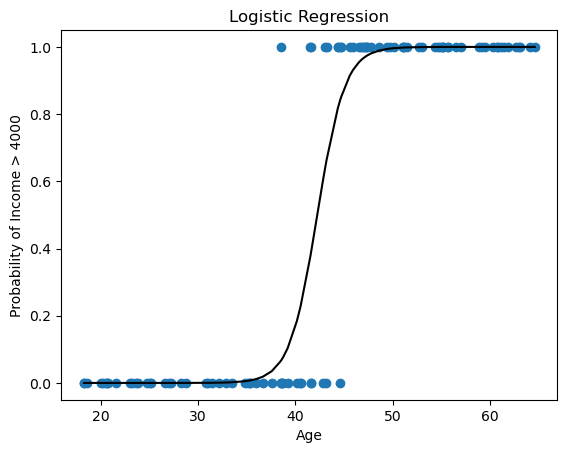

In [36]:
np.random.seed(1234)
age = np.random.uniform(18, 65, 100).reshape(-1, 1)
income = np.random.normal((age / 10), 0.5)
income_bin = (income > 4).astype(int)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1e5, solver='liblinear')
log_reg.fit(age, income_bin)

coef = log_reg.coef_
interc = log_reg.intercept_

lin_pred = (age * coef + interc)
mod_income = 1 / (1 + np.exp(-lin_pred))

age_ordered, mod_income_ordered = zip(*sorted(zip(age, mod_income.ravel()), key=lambda x: x[0]))
plt.scatter(age, income_bin)
plt.plot(age_ordered, mod_income_ordered, color='black')
plt.xlabel('Age')
plt.ylabel('Probability of Income > 4000')
plt.title('Logistic Regression')
plt.show()


# MLE Review

## MLE

Maximum Likelihood Estimation (MLE) is a method to estimate model parameters by finding values that make the observed data most likely.

### Example: Coin Flipping
Imagine flipping a coin 100 times and getting 55 heads. MLE finds the probability of heads (p) that makes this outcome most likely. Here, the MLE for p is simply 0.55 because that's the observed proportion of heads.

# MLE and Logistic Regression

## MLE and Logistic Regression
Logistic regression uses Maximum Likelihood Estimation (MLE) to find the parameters that maximize the likelihood of the observed data. It predicts probabilities for binary outcomes using features, such as predicting the risk of heart disease based on various factors.

### Formula
For a feature $ X $:
$\pi_i=Pr(Y_i=1|X_i=x_i)=\dfrac{\text{exp}(\beta_0+\beta_1 x_i)}{1+\text{exp}(\beta_0+\beta_1 x_i)}$

Combining these probabilities:
$ L(\beta_0,\beta_1)=\prod\limits_{i=1}^N \pi_i^{y_i}(1-\pi_i)^{n_i-y_i}=\prod\limits_{i=1}^N \dfrac{\text{exp}\{y_i(\beta_0+\beta_1 x_i)\}}{1+\text{exp}(\beta_0+\beta_1 x_i)}$   

## Algorithm Bias and Ethical Concerns
Logistic regression models reflect the data they are trained on. If the training data has biases, such as racial or gender biases, the model will perpetuate these biases. It's crucial to preprocess and normalize data carefully to avoid these issues.

# Gradient Descent

Gradient descent is an optimization algorithm used to minimize a function by iteratively moving towards the minimum value of the function. It is used extensively in machine learning, particularly for optimizing the parameters of models such as linear and logistic regression.

### Cost Function
The cost function (or loss function) measures how well the model's predictions match the actual data. For linear regression, this is often the Residual Sum of Squares (RSS):
$ \text{RSS} = \sum (\hat{y} - y)^2 $

### Gradient Descent Algorithm
1. **Initialization**: Start with an initial guess for the parameters.
2. **Learning Rate**: Choose a step size ($\alpha$), which determines how big of a step to take towards the minimum.
3. **Iteration**: Update the parameters iteratively to reduce the cost function:
   $ \theta := \theta - \alpha \cdot \nabla J(\theta) $ 
   where $\nabla J(\theta)$ is the gradient of the cost function.

### Example: Linear Regression
For a simple linear regression, you might want to minimize the RSS between the predictions and the actual values.


<img src="images/gradientanimated.gif">

# Confusion Matrices

## How to Evaluate Classifier Performance?

A confusion matrix helps evaluate the performance of a classifier by showing the following:

- **True Positives (TP)**: Predicted 1, actually 1
- **True Negatives (TN)**: Predicted 0, actually 0
- **False Positives (FP)**: Predicted 1, actually 0
- **False Negatives (FN)**: Predicted 0, actually 1

### Example Confusion Matrix for Binary Classification



In [37]:
from sklearn.metrics import confusion_matrix

# Example labels and predictions
example_labels = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
example_preds  = [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]

# Compute the confusion matrix
cf = confusion_matrix(example_labels, example_preds)
print(cf)

[[2 3]
 [2 4]]


Confusion Matrix
<table border="1" style="border-collapse: collapse; text-align: center; table-layout: fixed; width: 300px;">
  <tr>
    <th style="width: 100px; height: 100px;"></th>
    <th style="width: 100px; height: 100px;">Predicted Negative</th>
    <th style="width: 100px; height: 100px;">Predicted Positive</th>
  </tr>
  <tr>
    <th style="width: 100px; height: 100px;">Actual Negative</th>
    <td style="background-color: #90ee90; width: 100px; height: 100px;">TN: 2</td>
    <td style="background-color: #ffcccb; width: 100px; height: 100px;">FP: 3</td>
  </tr>
  <tr>
    <th style="width: 100px; height: 100px;">Actual Positive</th>
    <td style="background-color: #ffcccb; width: 100px; height: 100px;">FN: 2</td>
    <td style="background-color: #90ee90; width: 100px; height: 100px;">TP: 4</td>
  </tr>
</table>


In a confusion matrix, the diagonal elements from the top-left to the bottom-right are the cases where the predicted label matches the actual label. 

# Evaluation Metrics

## Evaluation metrics for classification

When evaluating classification models, it's important to measure how well the model is performing. Unlike regression models that measure error as a distance from actual values, classification models focus on the number of correct and incorrect predictions. Key metrics include precision, recall, accuracy, and F1 score.

## Precision and recall

**Precision** and **Recall** are fundamental evaluation metrics.

### Precision

**Precision** measures the accuracy of the positive predictions. It answers the question: "Times it predicted positive correctly over the total number of predicted positives"

$ \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}} $

It will favor FP since it is part of the equation.  P in Precision for false Positive

### Recall

**Recall** measures the model's ability to capture positive outcomes. It answers the question: "Times it predicted positive correctly over the actual total number of positives in the dataset"

$ \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}} $

It will favor FN since it is part of the equation.  the A in recAll for actual number of positives, which means counting the false negatives because false negatives are actually positives but we predicted them wrong

### Relationship between precision and recall

Precision and recall have an inverse relationship. As recall increases, precision may decrease, and vice versa. The choice between focusing on precision or recall depends on the problem at hand.

## Accuracy and F1 score

### Accuracy

**Accuracy** measures the overall correctness of the model. It answers: "Out of all predictions made, how many were correct?"

$ \text{Accuracy} = \frac{\text{True Positives (TP) + True Negatives (TN)}}{\text{Total Observations}} $

### F1 score

The **F1 score** is the harmonic mean of precision and recall. It provides a balance between the two metrics, ensuring that both precision and recall are reasonably high.

$ \text{F1 score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $

The F1 score is particularly useful when you need to find a balance between precision and recall, especially in cases where you have an uneven class distribution.

### Which metric to use?

The choice of metric depends on the specific business problem and the consequences of false positives and false negatives. For example, in medical diagnostics, recall might be more important to ensure that no case is missed, while in spam detection, precision might be prioritized to avoid misclassifying important emails as spam.

## Classification reports

Scikit-learn provides a built-in function to create a classification report, which includes precision, recall, F1 score, and support (number of occurrences of each label in $y_{\text{true}}$).


In [38]:

from sklearn.metrics import classification_report

# Example usage:
y_true = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.57      0.67      0.62         6

    accuracy                           0.55        11
   macro avg       0.54      0.53      0.53        11
weighted avg       0.54      0.55      0.54        11



# ROC Curves and AUC

## ROC Curve

- **ROC Curve (Receiver Operating Characteristic)**: Illustrates the true positive rate (recall) against the false positive rate.
  - **True Positive Rate (TPR)**: $ \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} $
  - **False Positive Rate (FPR)**: $ \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} $
- Best models have ROC curves that hug the upper left corner. A 50-50 accuracy (random guessing) results in a worthless classifier.
- **AUC (Area Under the Curve)**: Measures the overall performance of the classifier. 
  - **AUC of 1**: Perfect classifier.
  - **AUC of 0.5**: No better than random guessing.
- ROC curves help understand the trade-off between false positive and true positive rates.

## Train a Classifier

In [40]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
y = df['target']
X = df.drop(columns='target', axis=1)

# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

# Predict
y_hat_test = logreg.predict(X_test)

# Data preview
print("")
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each of the datapoints
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate AUC
print('AUC: {}'.format(auc(fpr, tpr)))


AUC: 0.8823114869626498


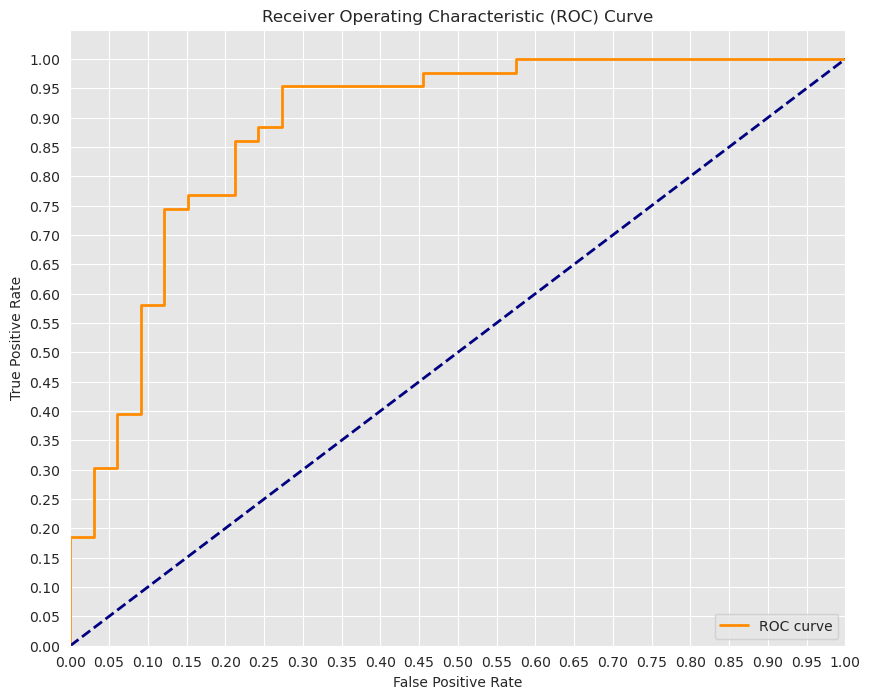

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Class Imbalance Problems

## Class Weight

- **Class Weight**: Adjusting weights for classes to handle imbalance.
  - Default is `None` (equal importance to both classes).
  - `'balanced'`: Weights inversely proportional to class frequencies.
  - Custom weights: Specify using a dictionary, e.g., `{'class_label': weight}`.


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
df = pd.read_csv('mobile_app_attribution.csv')

# Define appropriate X and y
y = df['is_attributed']
X = df[['ip', 'app', 'device', 'os', 'channel']]
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/home/atrix/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC for None: 0.5304139022848029
AUC for Balanced: 0.8320950632779985
AUC for 2 to 1: 0.5306769707722653
AUC for 10 to 1: 0.6415556195203895
AUC for 100 to 1: 0.7484994479100802
AUC for 1000 to 1: 0.855192594445126


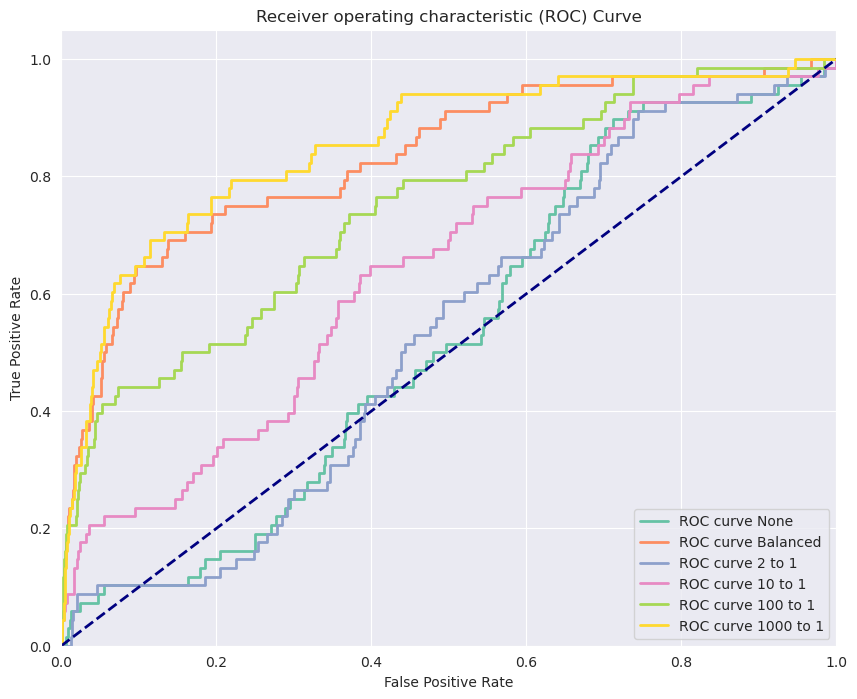

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Compare models with different class weights
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight=weight, solver='lbfgs')
    model_log = logreg.fit(X_train, y_train)
    y_score = logreg.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n], lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Oversampling and Undersampling

- **Oversampling**: Increasing the number of minority class samples.
- **Undersampling**: Reducing the number of majority class samples.
- Both techniques aim to balance the dataset and improve classifier performance.

## SMOTE (Synthetic Minority Oversampling)

- **SMOTE**: Generates synthetic samples for the minority class by combining features of the nearest neighbors.
- Effective for dealing with class imbalances without simply duplicating data points.


# Introduction to Decision Trees

## From Graphs to Decision Trees

- **Decision Tree Classifier**: Performs a recursive partition of the sample space.
- **Tree Structure**:
  - **Root Node**: No incoming edges.
  - **Internal Nodes**: Have outgoing edges, partition the space.
  - **Leaf Nodes**: No outgoing edges, represent a class.

## Partitioning the Sample Space

- **Internal Node**: Partitions sample space into sub-spaces based on attributes.
- **Decision Making**: Each internal node checks for a condition, each terminal node represents a class.

## Definition

- **Decision Tree**: A classifier where internal nodes represent choices and leaf nodes represent classifications. An instance is routed down the tree based on attribute values until it reaches a leaf.

## Training Process

1. **Dataset**: Present training examples with features and target.
2. **Train the Model**: Make splits using feature values (e.g., information gain, Gini index).
3. **Grow the Tree**: Until stopping criteria are met (e.g., set depth).
4. **Predict**: Use the trained tree to classify new examples.

## Splitting Criteria

- **Recursive Binary Splitting**: Features are considered and split points tested using a cost function. The split with the lowest cost is selected.
- **Algorithms**:
  - **CART**: Uses Gini Index.
  - **ID3**: Uses entropy and information gain.

## Greedy Search

- **Top-Down Search**: Attribute that best classifies the training data is used at the root.
- **Information Gain**: Measures how much information a feature provides about the class. Decision trees maximize information gain.

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/dt1.png" width="600">

# Entropy and Information Gain

## Shannon's Entropy

- **Entropy**: A measure of disorder or uncertainty.
  - Named after Claude Shannon.
  - Quantifies the amount of information in a variable.
  - Higher entropy means less predictive power.

## Entropy and Decision Trees

- **Decision Trees**: Aim to tidy the data by separating samples and grouping them into classes.
  - Maximize purity of classes while making splits.

## Calculating Entropy

- For a sample $S$ with $N$ items, $n$ are True, and $m$ are False:
  - $p = n/N$ (class 1)
  - $q = m/N = 1-p$ (class 2)
  - Entropy formula: $E = -p \cdot \log_2(p) - q \cdot \log_2(q)$
  - Entropy is highest (1) when classes are equally split and lowest (0) when one class dominates.

## Generalization of Entropy

- Entropy $H(S)$ for a multiclass variable:
  - Formula: $H(S) = -\sum (P_i \cdot \log_2(P_i))$
  - $H(S) = 0$: Perfectly classified set.

## Information Gain

- **Information Gain**: Measures impurity reduction after a split.
  - Formula: $IG(A, S) = H(S) - \sum{}{p(t)H(t)}$
  - Decision trees maximize information gain.
  - Higher information gain means a better split.

## Entropy and Information Gain Example

- Dataset example: Predicting if we want to play tennis based on weather, temperature, humidity, and windiness.

```plaintext
|  outlook | temp | humidity | windy | play |
|:--------:|:----:|:--------:|:-----:|:----:|
| overcast | cool |   high   |   Y   |  yes |
| overcast | mild |  normal  |   N   |  yes |
|   sunny  | cool |  normal  |   N   |  yes |
| overcast |  hot |   high   |   Y   |  no  |
|   sunny  |  hot |  normal  |   Y   |  yes |
|   rain   | mild |   high   |   N   |  no  |
|   rain   | cool |  normal  |   N   |  no  |
|   sunny  | mild |   high   |   N   |  yes |
|   sunny  | cool |  normal  |   Y   |  yes |
|   sunny  | mild |  normal  |   Y   |  yes |
| overcast | cool |   high   |   N   |  yes |
|   rain   | cool |   high   |   Y   |  no  |
|   sunny  |  hot |  normal  |   Y   |  no  |
|   sunny  | mild |   high   |   N   |  yes |
```

Let's apply the formulas we saw earlier to this problem:  

$$\Large  H(S) = \sum{}{-p(c) log_2 p(c)}$$

$$\large C={\{yes, no\}}$$

Out of 14 instances, 9 are classified as yes, and 5 as no. So:

$ p(yes) = -(9/14) \cdot \log_2(9/14) = 0.41 $

$ p(no) = -(5/14) \cdot \log_2(5/14) = 0.53 $

$ H(S) = p(yes) + p(no) = 0.94 $

The current entropy of our dataset is 0.94.
Lower entropy or gini is better

# Building Trees using scikit-learn

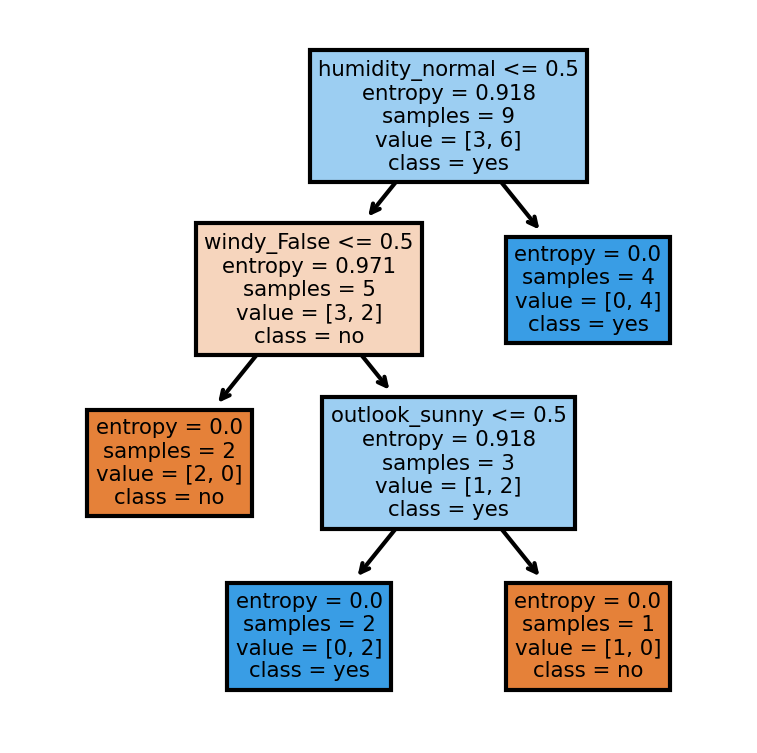

Accuracy:  0.6


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# Load the dataset
df = pd.read_csv('tennis.csv')
df.head()

# Create Training and Test Sets

# Split the data into training and test sets (70% training, 30% testing).
X = df[['outlook', 'temp', 'humidity', 'windy']]
y = df[['play']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encode Categorical Data as Numbers

# Use OneHotEncoder to convert categorical data into numerical format.
ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary, it's only to show the result of the OHE
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(X_train.columns))
ohe_df.head()

# Train the Decision Tree

# Create the classifier and fit it on the training data
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_ohe, y_train)

# Plot the Decision Tree

# Visualize the decision tree using matplotlib and sklearn's `plot_tree` function.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,3), dpi=300)
tree.plot_tree(clf,
               feature_names=ohe_df.columns.tolist(), 
               class_names=['no', 'yes'],
               filled=True)
plt.show()

# Evaluate the Predictive Performance

# Generate predictions and evaluate the model's accuracy.
X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))


# Hyperparameter Tuning and Pruning in Decision Trees

## Hyperparameter Optimization

- **Hyperparameters**: Values set before the learning process begins, affecting model training and prediction performance.

## Tree Pruning

- **Tree Pruning**: Reduces complexity to prevent overfitting by removing parts of the tree that don't improve model performance.
  - **Maximum Depth**: Limits the depth of the tree to avoid overfitting.
  - **Minimum Samples Split**: Minimum number of samples required to split an internal node.
  - **Minimum Samples Leaf**: Minimum number of samples that a leaf node must contain.
  - **Maximum Leaf Nodes**: Limits the number of leaf nodes.
  - **Maximum Features**: Maximum number of features considered when splitting a node.

## `max_depth`

- Controls the depth of the tree.
- **Overfitting**: Too deep a tree captures too much detail, resulting in poor generalization.
- **Underfitting**: Too shallow a tree doesn't capture enough detail, resulting in poor model performance.

## `min_samples_split`

- Minimum number of samples required to split an internal node.
- Balances between too many splits (complex model) and too few splits (simple model).

## `min_samples_leaf`

- Minimum number of samples that a leaf node must contain.
- Prevents creating leaf nodes with very few samples.

## Additional Hyperparameters

- **Consult the official Scikit-learn documentation** for more hyperparameters: [Scikit-learn DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


# Regression with CART Trees

## Recursive Partitioning

- **Global Model**: Linear regression fits a single model over the entire sample space.
- **Partitioning**: Divides the sample space into smaller regions to handle nonlinear relationships.
- **Recursive Partitioning**: Continues partitioning until simple regression models can be fit to the smaller subsets.

## Simple Local Models

- **Local Models**: Each leaf node in a regression tree represents a cell of the partition.
- **Prediction**: Uses the sample mean of the dependent variable for each partition.
- **Visualization**: Decision boundaries are always horizontal or vertical.

## CART Training Algorithm

- **CART Algorithm**: Builds a binary tree with nodes splitting the data to minimize mean squared error (MSE).
- **Cost Function**:
  $
  J(D, \theta) = \frac{n_{left}}{n_{total}} MSE_{left} + \frac{n_{right}}{n_{total}} MSE_{right}
  $
- **Mean Squared Error (MSE)**:
  $
  \hat{y}_m = \frac{1}{n_{m}} \sum_{i \in D_m} y_i
  $
  $
  MSE_m = \frac{1}{n_{m}} \sum_{i \in D_m} (y_i - \hat{y}_m)^2
  $

## Generate Data

- Generate synthetic data for `X` and `y`.

## Fit a Regression Tree

- Use `DecisionTreeRegressor` from Scikit-learn.


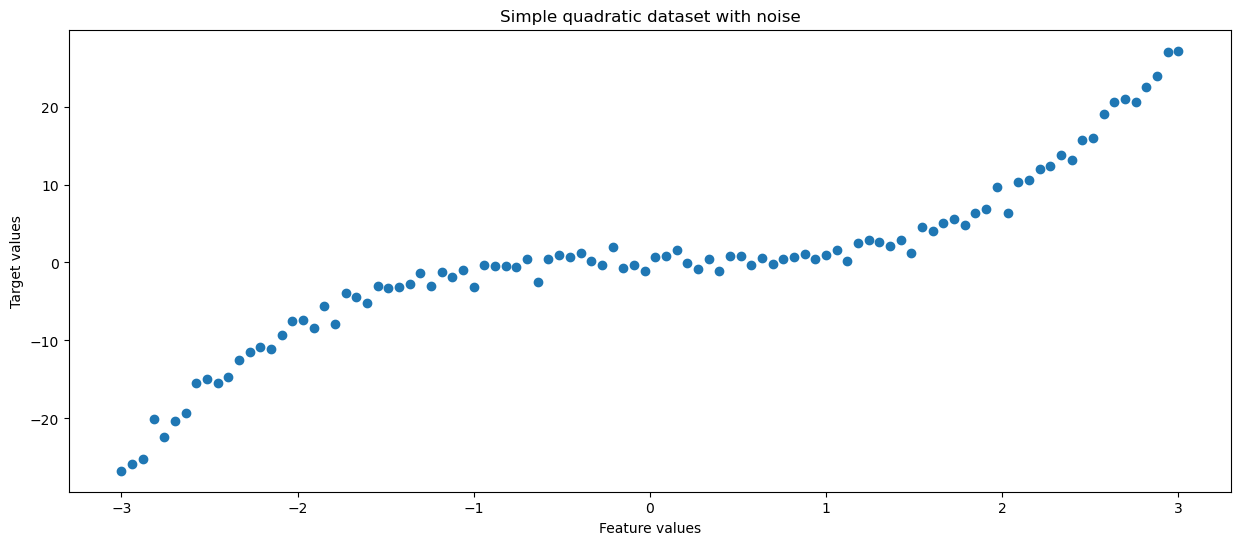

MSE score: 7.651234359344747
R-squared score: 0.9134119360857194


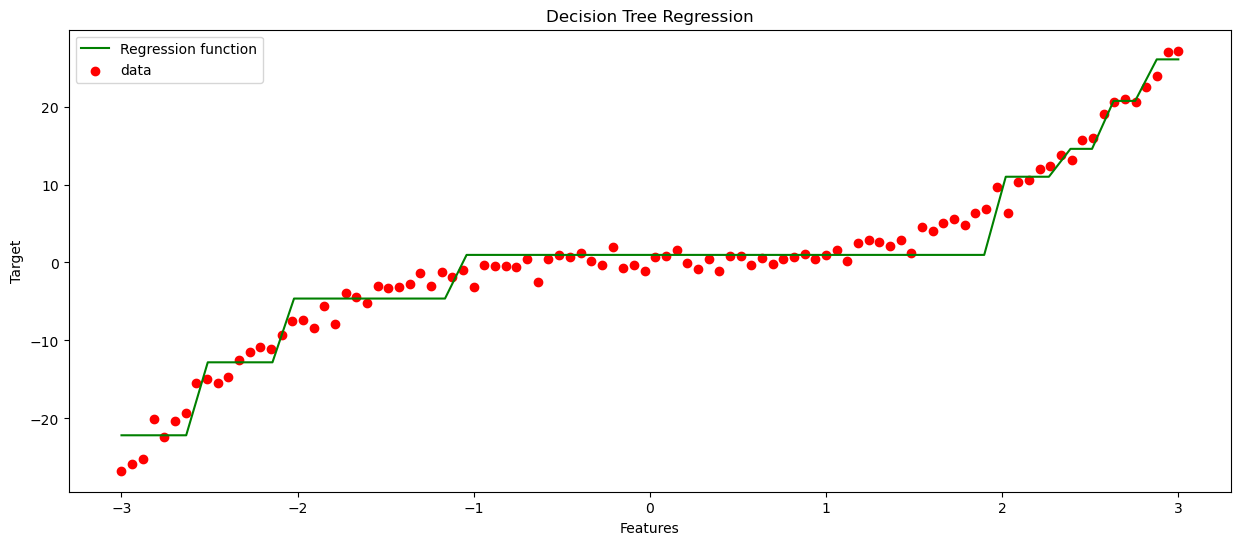

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate data
np.random.seed(124)
X = np.linspace(-3, 3, 100)
y = X ** 3 + np.random.randn(100)

# Plot the data
plt.figure(figsize=(15,6))
plt.scatter(X, y)
plt.title("Simple quadratic dataset with noise")
plt.xlabel("Feature values")
plt.ylabel("Target values")
plt.show()

# Create features and labels, split into training and test sets
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit a regression tree
regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
regressor.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = regressor.predict(X_test)
print('MSE score:', mean_squared_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

# Visualize the model fit
X_grid = np.linspace(min(X), max(X))
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(15,6))
plt.scatter(X, y, color='red', label='data')
plt.plot(X_grid, regressor.predict(X_grid), color='green', label='Regression function')
plt.title('Decision Tree Regression')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()
